In [2]:
import pandas as pd
import seaborn as sns
import scipy.stats as st

## Assignment 11

In [3]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Body mass

In [4]:
penguins.body_mass_g.groupby(penguins.species).mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

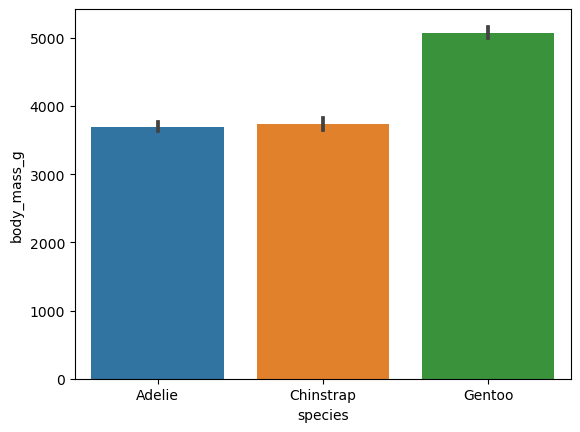

In [5]:
sns.barplot(y="body_mass_g", x="species", data=penguins)

Op basis van de mediaan en de confidence interval is er te zien dat er subtiel verband is tussen het gewicht van de penguin en de soort. De Adelie en Chinstrap hebben een mediaan die dicht bij elkaar liggen, dit betekent dat betreft deze soorten er geen significant verband is tussen het gewicht en deze soorten. Echter heeft de gentoo soort wel een verband met het gewicht van een penguin. De Gentoo penguin is namelijk gemiddeld een stuk zwaarder dan de andere twee soorten.

### Bill length

In [6]:
penguins.bill_length_mm.groupby(penguins.species).mean()

species
Adelie       38.791391
Chinstrap    48.833824
Gentoo       47.504878
Name: bill_length_mm, dtype: float64

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

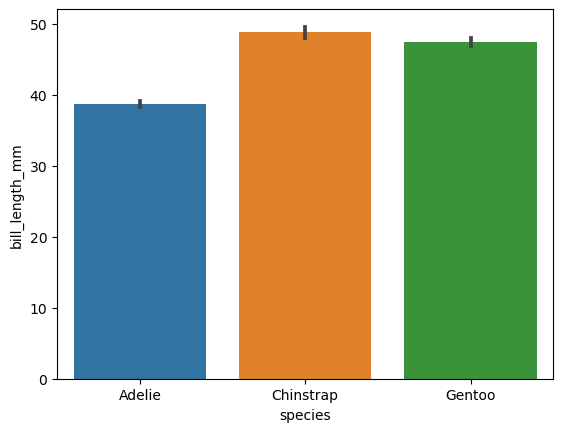

In [7]:
sns.barplot(y="bill_length_mm", x="species", data=penguins)

Het is moeilijk te zien of de confidence interval van chinstrap en gentoo overlappen omdat ze dicht bij elkaar liggen. Om dit beter te bekijken wordt de confidence interval berekent en naar de uiterste waardes gekeken. 

In [8]:
confidence = 0.95
species1 = penguins['species'] == 'Chinstrap'
penguinsSpecies = penguins[species1]
penguinsBillLength = penguinsSpecies.bill_length_mm.dropna()
st.t.interval(confidence, len(penguinsBillLength)-1, loc=penguinsBillLength.mean(), scale=st.sem(penguinsBillLength))

(48.02555140787451, 49.642095650949024)

In [9]:
confidence = 0.95
species1 = penguins['species'] == 'Gentoo'
penguinsSpecies = penguins[species1]
penguinsBillLength = penguinsSpecies.bill_length_mm.dropna()
st.t.interval(confidence, len(penguinsBillLength)-1, loc=penguinsBillLength.mean(), scale=st.sem(penguinsBillLength))

(46.95478342750218, 48.054972670058774)

De overlap van de confidence interval van de chinstrap en gentoo is minimaal met een confidence van 0.95. Echter wordt deze interval een stuk groter wanneer de confidence vergroot wordt. Dit betekent dat er geen verband is tussen de lengte van een snavel en een soort. De enige soort die invloed heeft op de snavellengte is Adelie, deze soort heeft namelijk een significant lager gemiddelde dan de andere soorten.

### Bill depth

In [10]:
penguins.bill_depth_mm.groupby(penguins.species).mean()

species
Adelie       18.346358
Chinstrap    18.420588
Gentoo       14.982114
Name: bill_depth_mm, dtype: float64

<AxesSubplot:xlabel='species', ylabel='bill_depth_mm'>

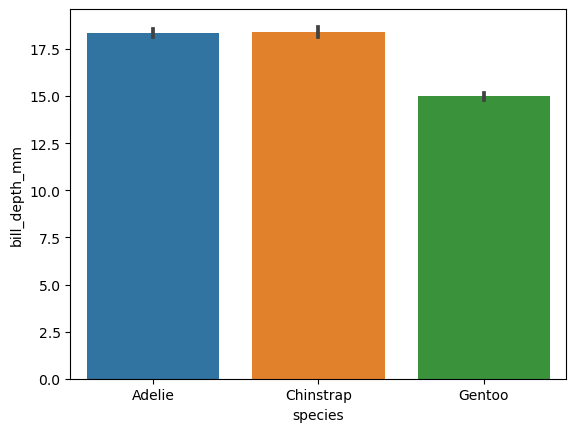

In [11]:
sns.barplot(y="bill_depth_mm", x="species", data=penguins)

Er is geen verband tussen de diepte van de snavel en de soort van de penguin. Dit geldt voor de soorten Adelie en Chinstrap. Echter de gemiddelde snaveldiepte van de soort Gentoo is erg laag in vergelijking tot de andere soorten. Dit betekent dat er wel een verband is tussen de soort Gentoo en de snaveldiepte. Als een penguin van de soort Gentoo is heeft het een minder diepe snavel dan als het van een andere soort is.

### Flipper length

In [12]:
penguins.flipper_length_mm.groupby(penguins.species).mean()

species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

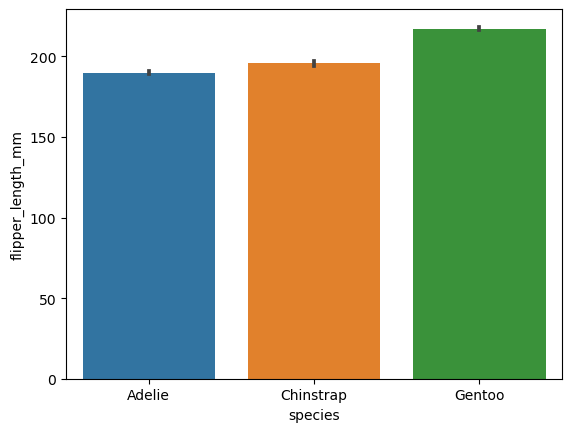

In [13]:
sns.barplot(y="flipper_length_mm", x="species", data=penguins)

Het is moeilijk te zien of de confidence interval van adelie en chinstrap overlapt omdat ze dicht bij elkaar liggen. Om dit beter te bekijken wordt de confidence interval berekent en naar de uiterste waardes gekeken. 

In [14]:
confidence = 0.95
species1 = penguins['species'] == 'Adelie'
penguinsSpecies = penguins[species1]
penguinsFlipperLength = penguinsSpecies.flipper_length_mm.dropna()
st.t.interval(confidence, len(penguinsFlipperLength)-1, loc=penguinsFlipperLength.mean(), scale=st.sem(penguinsFlipperLength))

(188.9021179338864, 191.00516683432554)

In [15]:
confidence = 0.95
species2 = penguins['species'] == 'Chinstrap'
penguinsSpecies = penguins[species2]
penguinsFlipperLength = penguinsSpecies.flipper_length_mm.dropna()
st.t.interval(confidence, len(penguinsFlipperLength)-1, loc=penguinsFlipperLength.mean(), scale=st.sem(penguinsFlipperLength))

(194.097243232267, 197.5498155912624)

Omdat het gemiddelde van de flipperlengtes en de confidence interval bij de verschillende soorten niet overlapt, is er een verband te trekken tussen de soort van de penguin en de flipperlengte van deze penguin. Dit betkent dat de soort van de penguin een significante invloed heeft op de flipperlengte.

## Assignment 12

In [16]:
songs = pd.read_csv('songs.csv', index_col='Unnamed: 0', quotechar="`") 
songs.head()

,Title,Artist,Genre,Year,BPM,Energy,Danceability,dB,Live,Valence,Duration,Acousticness,Speechiness,Popularity
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


### Numerieke waarde vs Year

In [17]:
songs.BPM.groupby(songs.Year).mean()

Year
2010    122.058824
2011    119.075472
2012    121.085714
2013    121.676056
2014    123.000000
2015    119.768421
2016    114.325000
2017    116.800000
2018    114.593750
2019    112.451613
Name: BPM, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='BPM'>

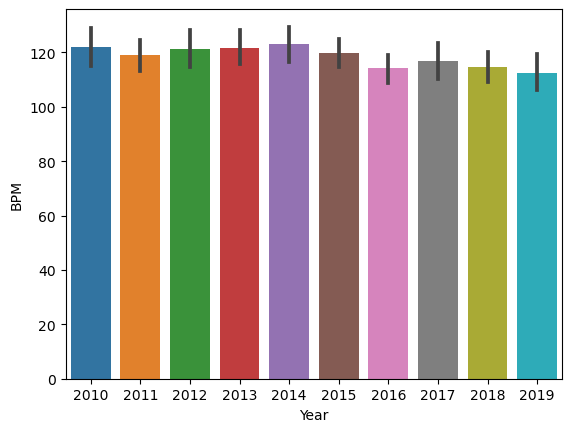

In [18]:
sns.barplot(y="BPM", x="Year", data=songs)

Er is een grote overlap te zien tussen de confidence intervals van de BPM per jaar. Dit betekent dat er geen verband is tussen het jaar en het aantal BPM in een nummer. 

### Numerieke waarde vs Genre

Om te analyseren of er een verband is tussen een numerieke waarde en een genre is er een selectie gemaakt van de top 5 genres. Dit is zodat er een algemene blik geworpen kan worden op de meest voorkomende genres en de gemiddeldes.

In [19]:
songs['Genre'].value_counts(dropna=False).head(10)

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
Name: Genre, dtype: int64

In [20]:
top5genres = songs[(songs.Genre == 'dance pop') | (songs.Genre == 'pop') | (songs['Genre'] == 'canadian pop') | (songs['Genre'] == 'barbadian pop') | (songs['Genre'] == 'boy band') ]
# | (songs['Genre'] == 'electropop') | (songs['Genre'] == 'british soul') | (songs['Genre'] == 'big room') | (songs['Genre'] == 'canadian contemporary r&b') | (songs['Genre'] == 'neo mellow') 

In [21]:
songs.Duration.groupby(songs.Genre).mean().head()

Genre
acoustic pop       238.000
alaska indie       250.000
alternative r&b    198.000
art pop            260.875
atl hip hop        284.400
Name: Duration, dtype: float64

<AxesSubplot:xlabel='Genre', ylabel='Duration'>

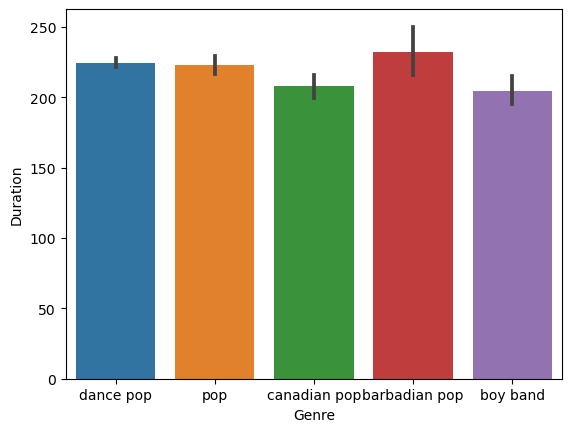

In [22]:
sns.barplot(y="Duration", x="Genre", data=top5genres)

Er is een klein subtiel verband te zien tussen de duur van een nummer en zijn genre. De (dance) pop nummers hebben gemiddeld een langere duur dan bijv. een boy band nummer. Echter is er veel overlap tussen de confidence intervals van de genres dus kan er met grote zekerheid gezegd worden dat er geen significant verband is tussen de lengte van een nummer en zijn genre.

### Numerieke waarde vs Artist

In [23]:
songs.BPM.groupby(songs.Artist).mean()

Artist
3OH!3                  138.000000
5 Seconds of Summer    160.000000
A Great Big World      138.000000
Adam Lambert           158.500000
Adele                  119.300000
                          ...    
ZAYN                   140.800000
Zara Larsson           146.000000
Zedd                   120.333333
fun.                   146.000000
will.i.am              128.000000
Name: BPM, Length: 184, dtype: float64

In [24]:
top10Artists = songs[(songs.Artist == 'Katy Perry') | (songs.Artist == 'Justin Bieber') | (songs['Artist'] == 'Rihanna') | (songs['Artist'] == 'Maroon 5') | (songs['Artist'] == 'Lady Gaga') ]
# | (songs.Artist == 'Bruno Mars') | (songs.Artist == 'Shawn Mendes') | (songs['Artist'] == 'Pitbull') | (songs['Artist'] == 'Ed Sheeran') | (songs['Artist'] == 'The Chainsmokers')

In [27]:
songs.Acousticness.groupby(songs.Artist).mean()

Artist
3OH!3                   1.0
5 Seconds of Summer     0.0
A Great Big World      87.0
Adam Lambert            1.0
Adele                  35.3
                       ... 
ZAYN                   10.4
Zara Larsson            0.0
Zedd                   14.0
fun.                    2.0
will.i.am               0.0
Name: Acousticness, Length: 184, dtype: float64

Als er gekeken wordt naar de gemiddeldes van de acousticness kolom van de dataset valt het op dat de waardes redelijk ver uit elkaar liggen. Naar aanleiding van deze data zou er verwacht kunnen worden dat er een verband is tussen de artiest en de acousticness van een nummer.

<AxesSubplot:xlabel='Artist', ylabel='Acousticness'>

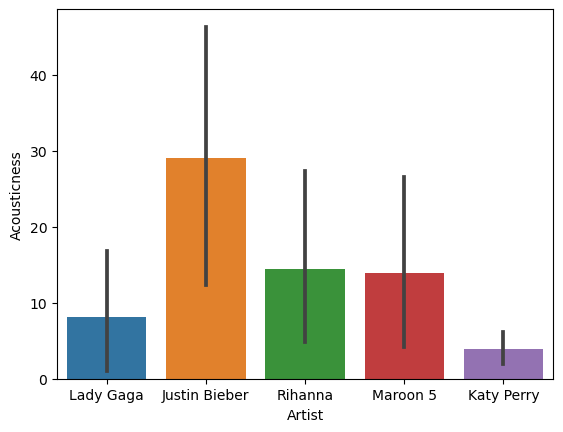

In [28]:
sns.barplot(y="Acousticness", x="Artist", data=top10Artists)

Echter wanneer er gekeken wordt naar de barplot van deze gemiddeldes valt het op dat de confidence interval erg groot is. Door deze grote interval overlappen de waardes van de acoustiness in verband met verschillende artiesten alsnog. Hoewel de gemiddeldes dus ver uit elkaar liggen, hebben deze waardes geen significant verband.